> Copyright (c) 2021-2022, NVIDIA CORPORATION.  All rights reserved.
>
> Licensed under the Apache License, Version 2.0 (the "License");
> you may not use this file except in compliance with the License.
> You may obtain a copy of the License at
>
>     http://www.apache.org/licenses/LICENSE-2.0
>
> Unless required by applicable law or agreed to in writing, software
> distributed under the License is distributed on an "AS IS" BASIS,
> WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
> See the License for the specific language governing permissions and
> limitations under the License.

# Federated Statistics with MONAI

Run using NVFlare's simulator:

### 1. Download the Spleen Bundle

Download the MONAI bundle as `./${JOB_NAME}/app/config/spleen_ct_segmentation`.

In [1]:
# Assume data was already downloaded following the README in spleen_ct_segmentation example
%env DATA_DIR=../data
%env JOB_NAME=job_stats
!python3 -m monai.bundle download --name "spleen_ct_segmentation" --version "0.4.6" --bundle_dir ../${JOB_NAME}/app/config

env: DATA_DIR=../data
env: JOB_NAME=job_stats
2023-03-14 14:28:37,124 - INFO - --- input summary of monai.bundle.scripts.download ---
2023-03-14 14:28:37,124 - INFO - > name: 'spleen_ct_segmentation'
2023-03-14 14:28:37,124 - INFO - > version: '0.3.7'
2023-03-14 14:28:37,124 - INFO - > bundle_dir: '../job_stats/app/config'
2023-03-14 14:28:37,124 - INFO - > source: 'github'
2023-03-14 14:28:37,125 - INFO - > remove_prefix: 'monai_'
2023-03-14 14:28:37,125 - INFO - > progress: True
2023-03-14 14:28:37,125 - INFO - ---


2023-03-14 14:28:37,125 - INFO - Expected md5 is None, skip md5 check for file ../job_stats/app/config/spleen_ct_segmentation_v0.3.7.zip.
2023-03-14 14:28:37,125 - INFO - File exists: ../job_stats/app/config/spleen_ct_segmentation_v0.3.7.zip, skipped downloading.
2023-03-14 14:28:37,125 - INFO - Writing into directory: ../job_stats/app/config.


### 2. Download the data

Download the spleen CT data from the [MSD challenge](http://medicaldecathlon.com/) and update data path.

In [2]:
!echo "Downloading data to ${DATA_DIR}"
!python3 ../download_spleen_dataset.py -f "${DATA_DIR}/Task09_Spleen.tar" -o "${DATA_DIR}"
!sed -i "s|/workspace/data/Task09_Spleen|${PWD}/${DATA_DIR}/Task09_Spleen|g" ../${JOB_NAME}/app/config/spleen_ct_segmentation/configs/train.json

2023-03-14 14:28:40,284 - INFO - Expected md5 is None, skip md5 check for file ../data/Task09_Spleen.tar.
2023-03-14 14:28:40,284 - INFO - File exists: ../data/Task09_Spleen.tar, skipped downloading.
2023-03-14 14:28:40,284 - INFO - Non-empty folder exists in ../data/Task09_Spleen, skipped extracting.


In [ ]:
import os
from nvflare.private.fed.app.simulator.simulator_runner import SimulatorRunner    

job_name = os.environ["JOB_NAME"]

simulator = SimulatorRunner(
    job_folder=f"../{job_name}",
    workspace="./",
    n_clients=2,
    threads=2,
    gpu="0,1"
)
run_status = simulator.run()
print("Simulator finished with run_status", run_status)

### 3. Plot the results
First, we show the results as table:

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, HTML
display(HTML("<style>.container { !important; }</style>"))

from nvflare.app_opt.statistics.visualization.statistics_visualization import Visualization

In [5]:
with open('./simulate_job/statistics/image_statistics.json', 'r') as f:
    data = json.load(f)

In [6]:
vis = Visualization()
vis.show_stats(data = data)


Intensity



,count,histogram
site-1-train#dataset#data,32,"[[-200.0, -195.0, 496658], [-195.0, -190.0, 47..."
site-1-validate#dataset#data,9,"[[-200.0, -195.0, 50513], [-195.0, -190.0, 496..."
site-1-total_data,41,"[[-200.0, -195.0, 496658], [-195.0, -190.0, 47..."
site-2-train#dataset#data,32,"[[-200.0, -195.0, 496658], [-195.0, -190.0, 47..."
site-2-validate#dataset#data,9,"[[-200.0, -195.0, 50513], [-195.0, -190.0, 496..."
site-2-total_data,41,"[[-200.0, -195.0, 496658], [-195.0, -190.0, 47..."
Global-train#dataset#data,64,"[[-200.0, -195.0, 993316], [-195.0, -190.0, 95..."
Global-validate#dataset#data,18,"[[-200.0, -195.0, 101026], [-195.0, -190.0, 99..."
Global-total_data,82,"[[-200.0, -195.0, 993316], [-195.0, -190.0, 95..."


Show the histograms using sample counts:

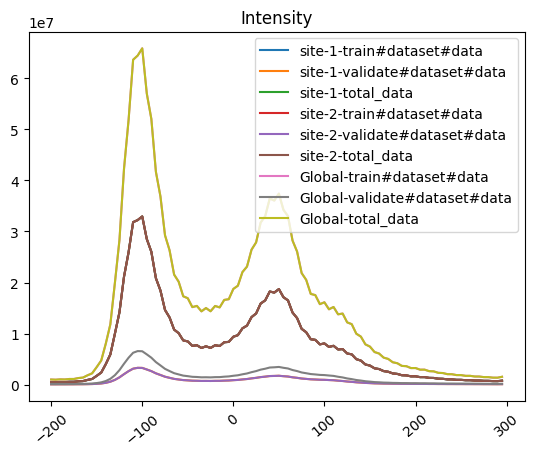

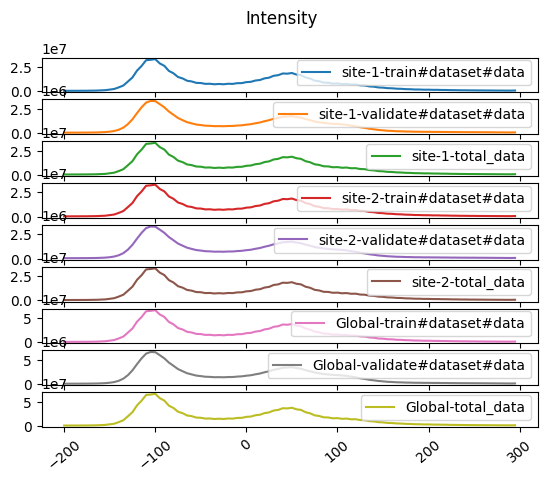

In [7]:
vis.show_histograms(data=data, display_format="sample_count", plot_type="both")

For better comparison between clients' data, show the histograms using normalized counts:

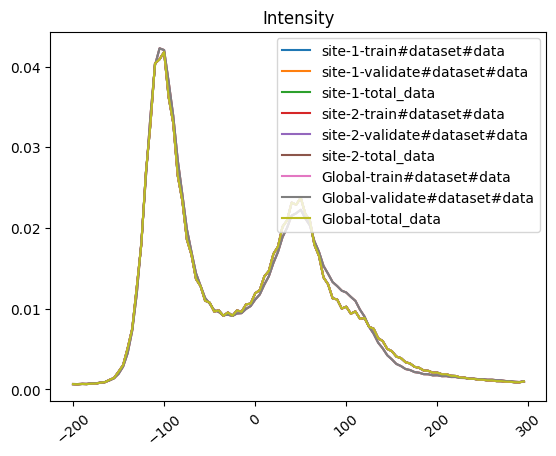

In [8]:
vis.show_histograms(data=data, display_format="percent", plot_type="main")
plt.savefig("histogram_main.png")

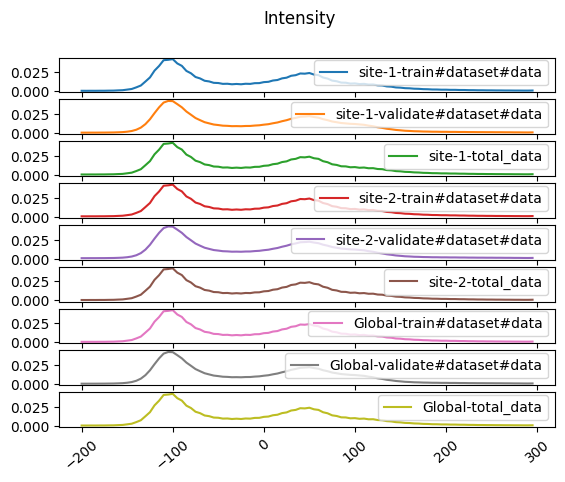

In [9]:
vis.show_histograms(data=data, display_format="percent", plot_type="subplot")
plt.savefig("histogram_subplot.png")